In [1]:
import noise
import numpy as np
import math
from PIL import Image
from matplotlib import pyplot as plt
import colorsys

In [2]:
def hsv2rgb(h,s,v):
    return list(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

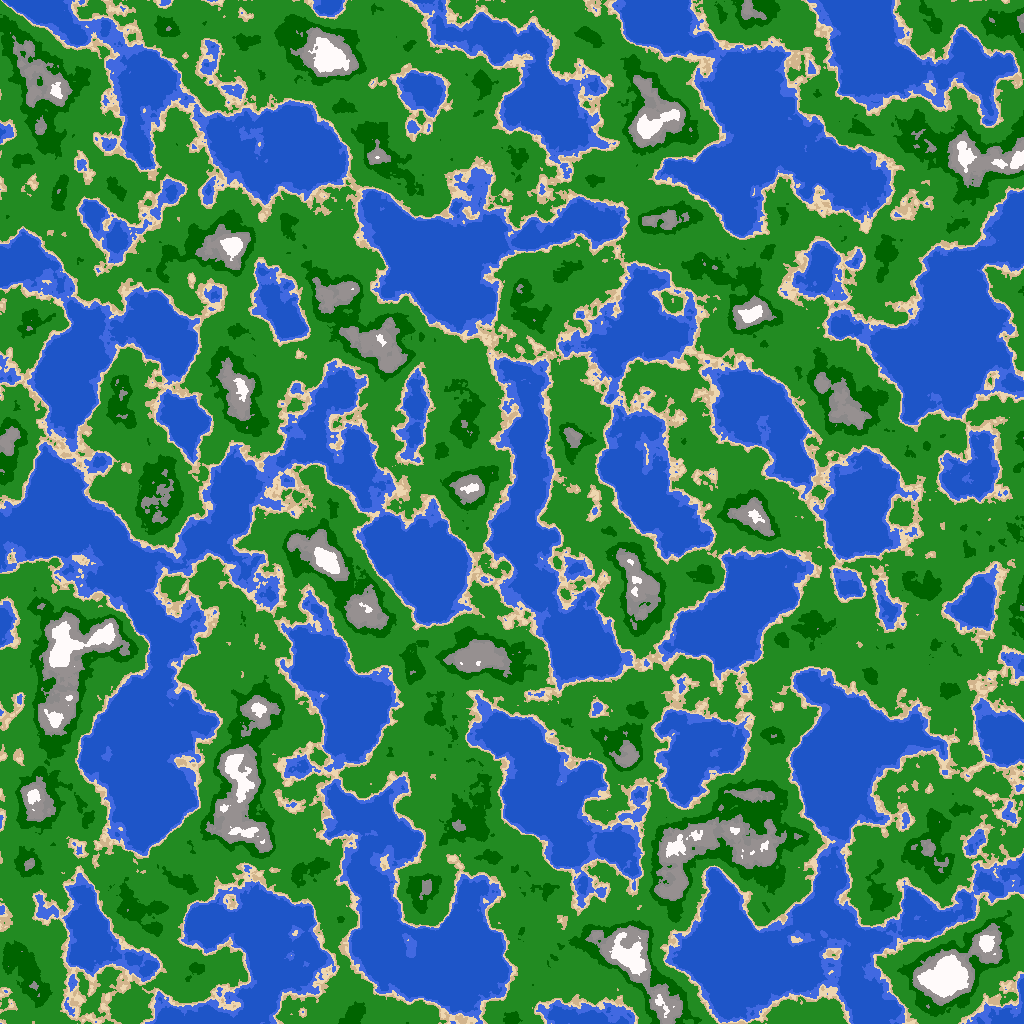

In [3]:
shape = (1024,1024)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = 50
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed)
world = (world - world.min())
world *= 100 / world.max()

ocean = [30,85,200]
blue = [65,105,225]
green = [34,139,34]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]
highmountain = [150, 144, 144]
lightblue = [0,191,255]
darkgreen = [0,100,0]
sandy = [210,180,140]

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        if world[i][j] < 43:
            color_world[i][j] = ocean
        elif world[i][j] < 47:
            color_world[i][j] = blue
        elif world[i][j] < 49:
            color_world[i][j] = beach
        elif world[i][j] < 51:
            color_world[i][j] = sandy
        elif world[i][j] < 67:
            color_world[i][j] = green
        elif world[i][j] < 75:
            color_world[i][j] = darkgreen
        elif world[i][j] < 78:
            color_world[i][j] = mountain
        elif world[i][j] < 84:
            color_world[i][j] = highmountain
        else:
            color_world[i][j] = snow

color_world = np.array(color_world).astype(np.uint8)

Image.fromarray(color_world)

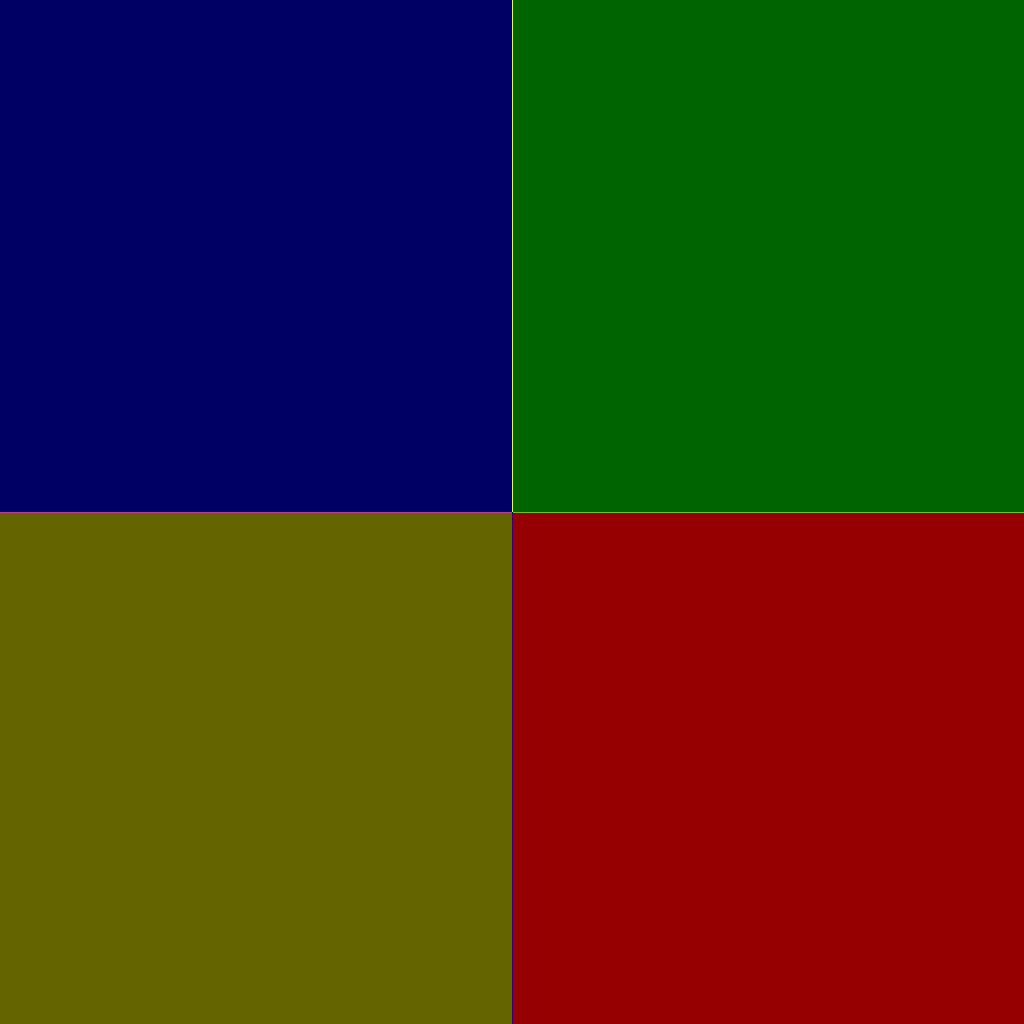

In [4]:
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = j - shape[1]/2
        y = i - shape[0]/2
        if x > 0 and y > 0:
            color_world[i][j] = [150, 0, 0]
        elif x > 0 and y < 0:
            color_world[i][j] = [0, 100, 0]
        elif x < 0 and y < 0:
            color_world[i][j] = [0, 0, 100]
        elif x < 0 and y > 0:
            color_world[i][j] = [100, 100, 0]
        else:
            if x==0:
                if y < 0:
                    color_world[i][j] = [255, 255, 0]
                elif y > 0:
                    color_world[i][j] = [0, 0, 255]
            else:
                if x < 0:
                    color_world[i][j] = [255, 0, 255]
                elif x > 0:
                    color_world[i][j] = [0, 255, 0]
Image.fromarray(np.array(color_world).astype(np.uint8))

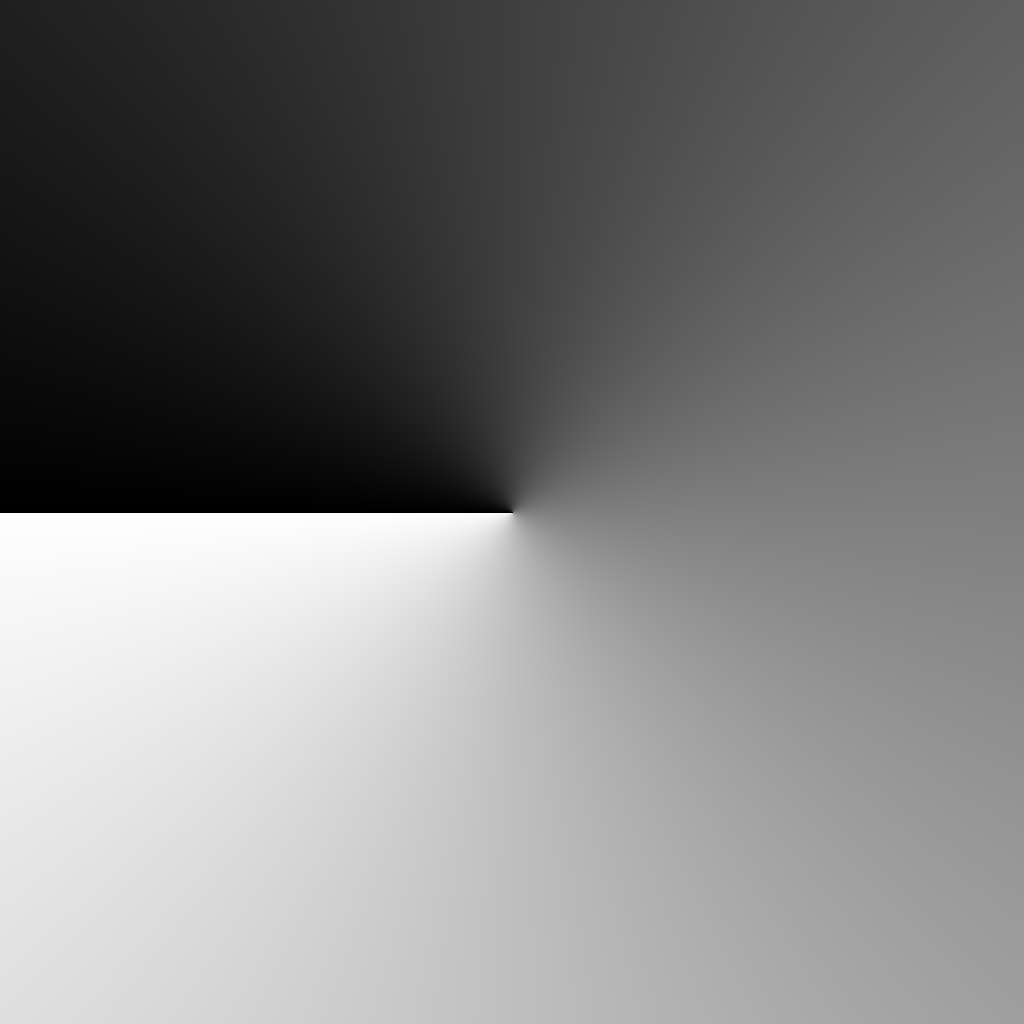

In [5]:
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        color_world[i][j] = theta*255/(np.pi*2)
Image.fromarray(np.array(color_world).astype(np.uint8))

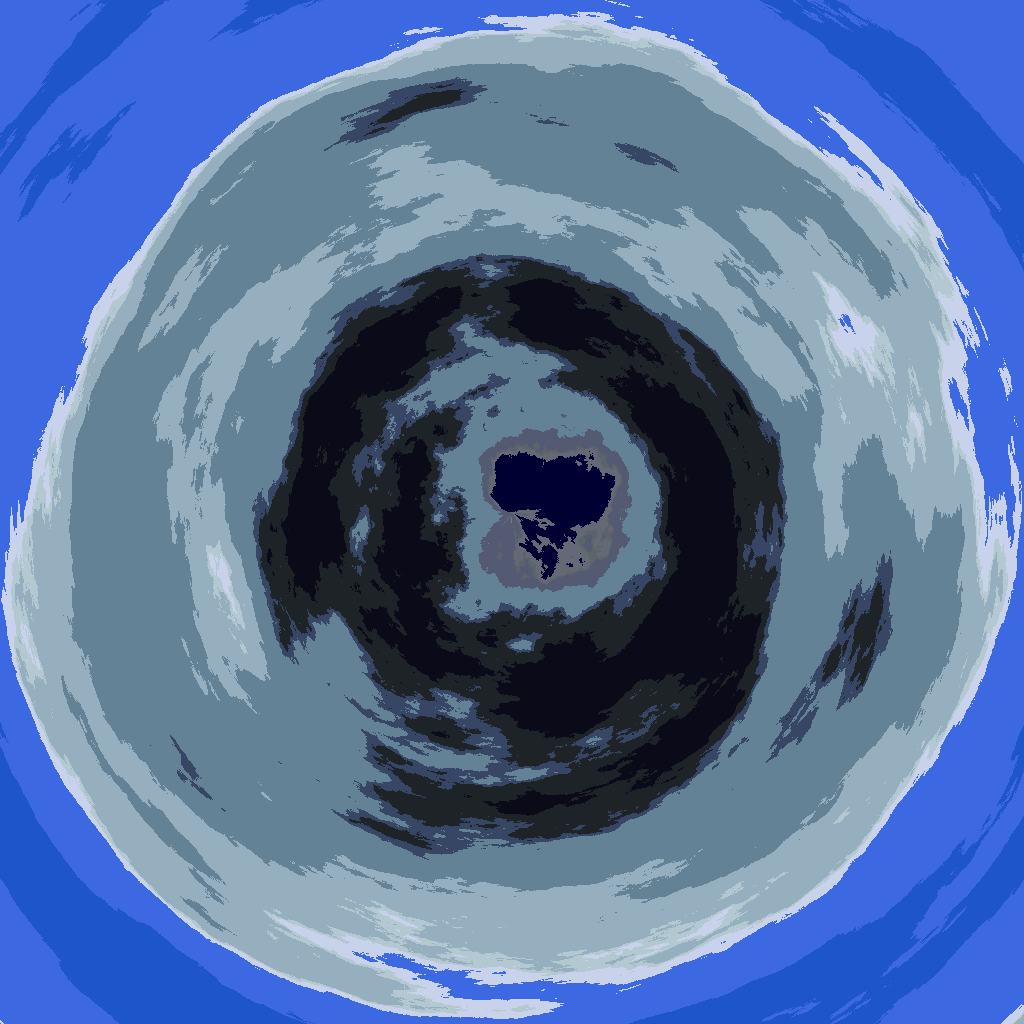

In [6]:
shape = (1024,1024)
octaves = 12
persistence = 0.6
lacunarity = 2.0
seed = 25
max_r = shape[0]/2

world = np.zeros(shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2.1)
        y = (shape[0]/2 - i)/(shape[0]/2.1)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r, 
                                    theta/(np.pi*2),
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1)
world = (world - world.min())
world *= 100 / world.max()

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2.1)
        y = (shape[0]/2 - i)/(shape[0]/2.1)
        r = np.sqrt(x**2 + y**2)
        if world[i][j] < 20:
            color_world[i][j] = [30,85,200] if r > 0.5 else [0, 0, 50]
        elif world[i][j] < 45:
            color_world[i][j] = [60,105,225] if r > 0.5 else [0, 0, 50]
        elif world[i][j] < 49:
            color_world[i][j] = [200, 210, 235] if r > 0.3 else [100, 105, 117]
        elif world[i][j] < 51:
            color_world[i][j] = [180, 200, 210] if r > 0.3 else [90, 100, 105]
        elif world[i][j] < 60:
            color_world[i][j] = [150, 175, 190] if r > 0.3 else [85, 90, 115]
        elif world[i][j] < 75:
            color_world[i][j] = [100, 130, 150]
        elif world[i][j] < 78:
            color_world[i][j] = [55, 70, 100]
        elif world[i][j] < 84:
            color_world[i][j] = [30, 35, 40]
        else:
            color_world[i][j] = [10, 10, 25]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

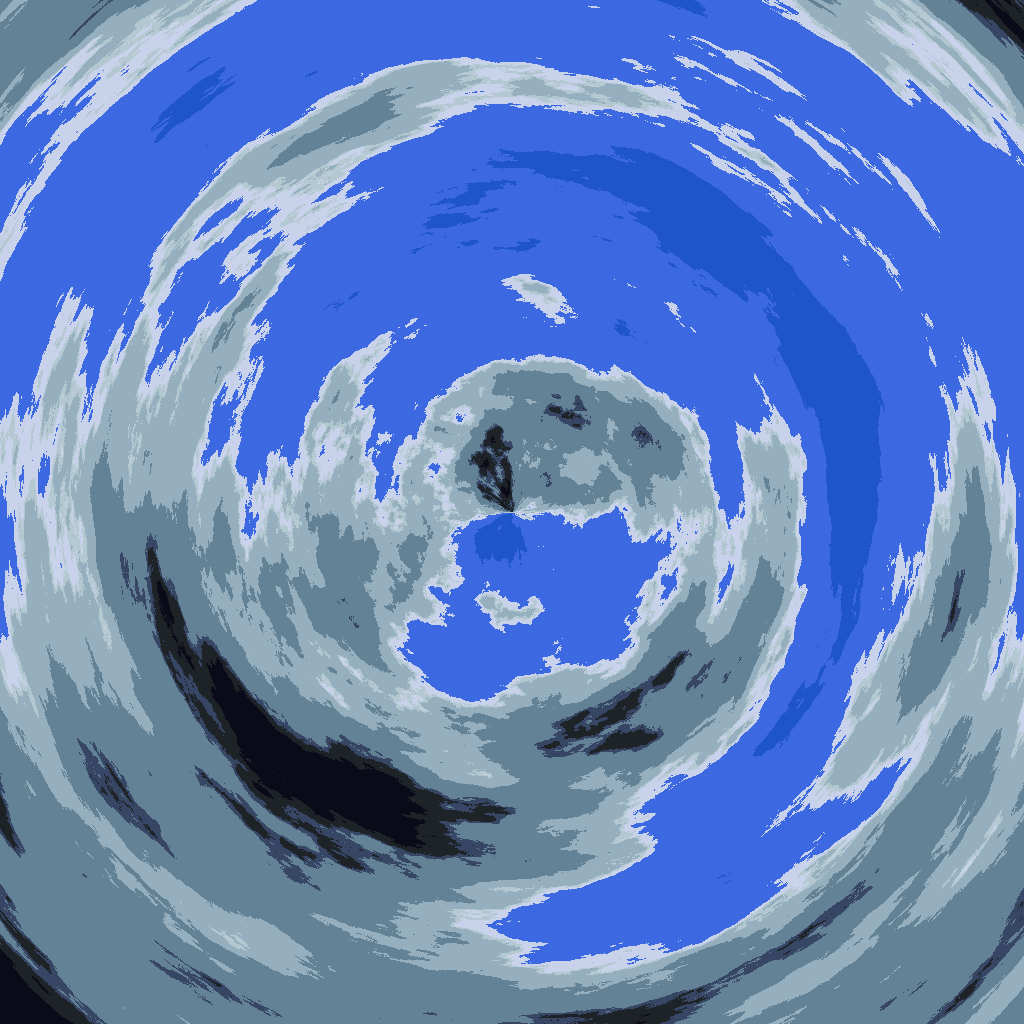

In [7]:
shape = (1024,1024)
octaves = 12
persistence = 0.6
lacunarity = 2.0
seed = 15
max_r = shape[0]/2

world = np.zeros(shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2.1)
        y = (shape[0]/2 - i)/(shape[0]/2.1)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r, 
                                    theta/(np.pi*2),
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1)
world = (world - world.min())
world *= 100 / world.max()

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2.1)
        y = (shape[0]/2 - i)/(shape[0]/2.1)
        r = np.sqrt(x**2 + y**2)
        if world[i][j] < 20:
            color_world[i][j] = [30,85,200]
        elif world[i][j] < 45:
            color_world[i][j] = [60,105,225]
        elif world[i][j] < 49:
            color_world[i][j] = [200, 210, 235]
        elif world[i][j] < 51:
            color_world[i][j] = [180, 200, 210]
        elif world[i][j] < 60:
            color_world[i][j] = [150, 175, 190]
        elif world[i][j] < 75:
            color_world[i][j] = [100, 130, 150]
        elif world[i][j] < 78:
            color_world[i][j] = [55, 70, 100]
        elif world[i][j] < 84:
            color_world[i][j] = [30, 35, 40]
        else:
            color_world[i][j] = [10, 10, 25]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

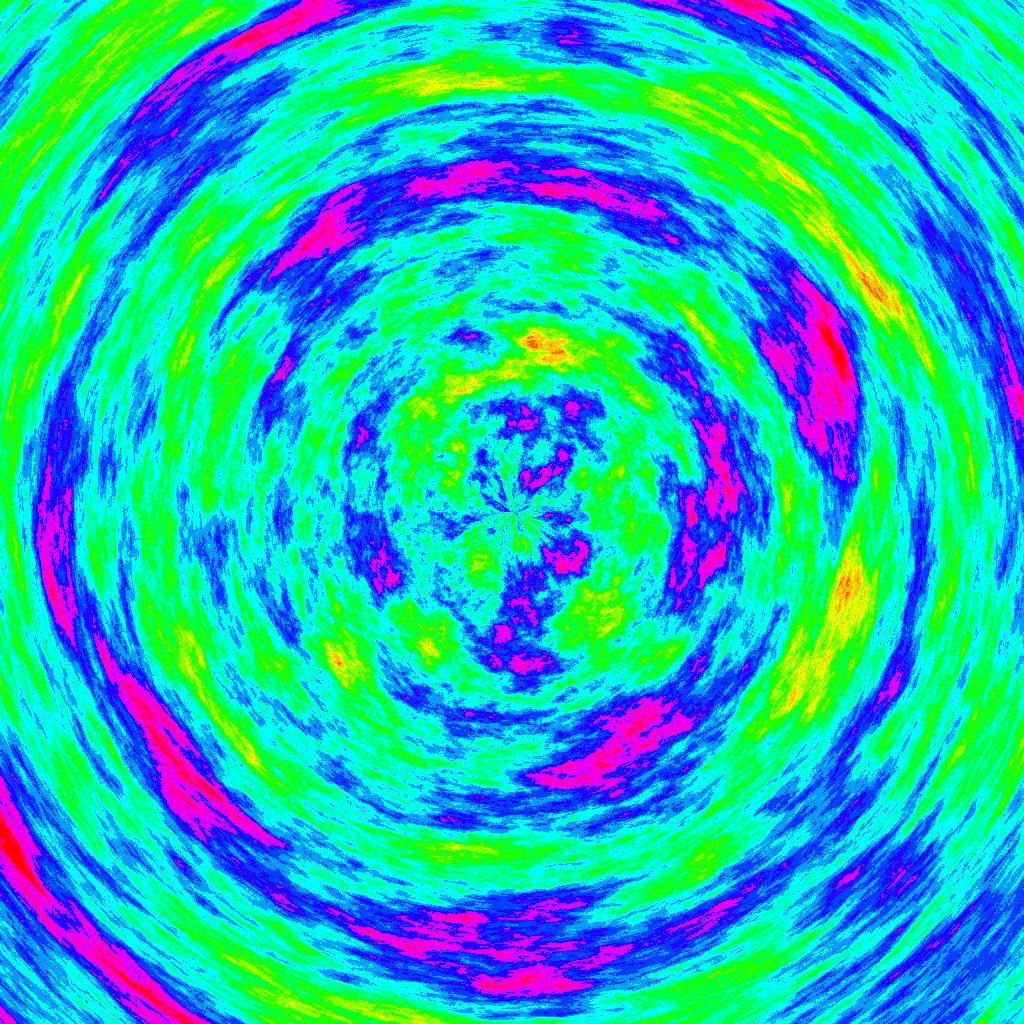

In [8]:
shape = (1024,1024)
octaves = 25
persistence = 0.7
lacunarity = 2.0
seed = 15
scale = 5
world = np.zeros(shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2.1)
        y = (shape[0]/2 - i)/(shape[0]/2.1)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)
world = (world - world.min())
world *= 100 / world.max()

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2.1)
        y = (shape[0]/2 - i)/(shape[0]/2.1)
        r = np.sqrt(x**2 + y**2)
        lt = np.arange(0, 101, step=6.25)
        if world[i][j] < lt[0]:
            color_world[i][j] = hsv2rgb(0,1,1)
        elif world[i][j] < lt[1]:
            color_world[i][j] = hsv2rgb(1/16,1,1)
        elif world[i][j] < lt[2]:
            color_world[i][j] = hsv2rgb(2/16,1,1)
        elif world[i][j] < lt[3]:
            color_world[i][j] = hsv2rgb(3/16,1,1)
        elif world[i][j] < lt[4]:
            color_world[i][j] = hsv2rgb(4/16,1,1)
        elif world[i][j] < lt[5]:
            color_world[i][j] = hsv2rgb(5/16,1,1)
        elif world[i][j] < lt[6]:
            color_world[i][j] = hsv2rgb(6/16,1,1)
        elif world[i][j] < lt[7]:
            color_world[i][j] = hsv2rgb(7/16,1,1)
        elif world[i][j] < lt[8]:
            color_world[i][j] = hsv2rgb(8/16,1,1)
        elif world[i][j] < lt[9]:
            color_world[i][j] = hsv2rgb(9/16,1,1)
        elif world[i][j] < lt[10]:
            color_world[i][j] = hsv2rgb(10/16,1,1)
        elif world[i][j] < lt[11]:
            color_world[i][j] = hsv2rgb(11/16,1,1)
        elif world[i][j] < lt[12]:
            color_world[i][j] = hsv2rgb(13/16,1,1)
        elif world[i][j] < lt[13]:
            color_world[i][j] = hsv2rgb(14/16,1,1)
        elif world[i][j] < lt[14]:
            color_world[i][j] = hsv2rgb(15/16,1,1)
        else:
            color_world[i][j] = hsv2rgb(1,1,1)
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

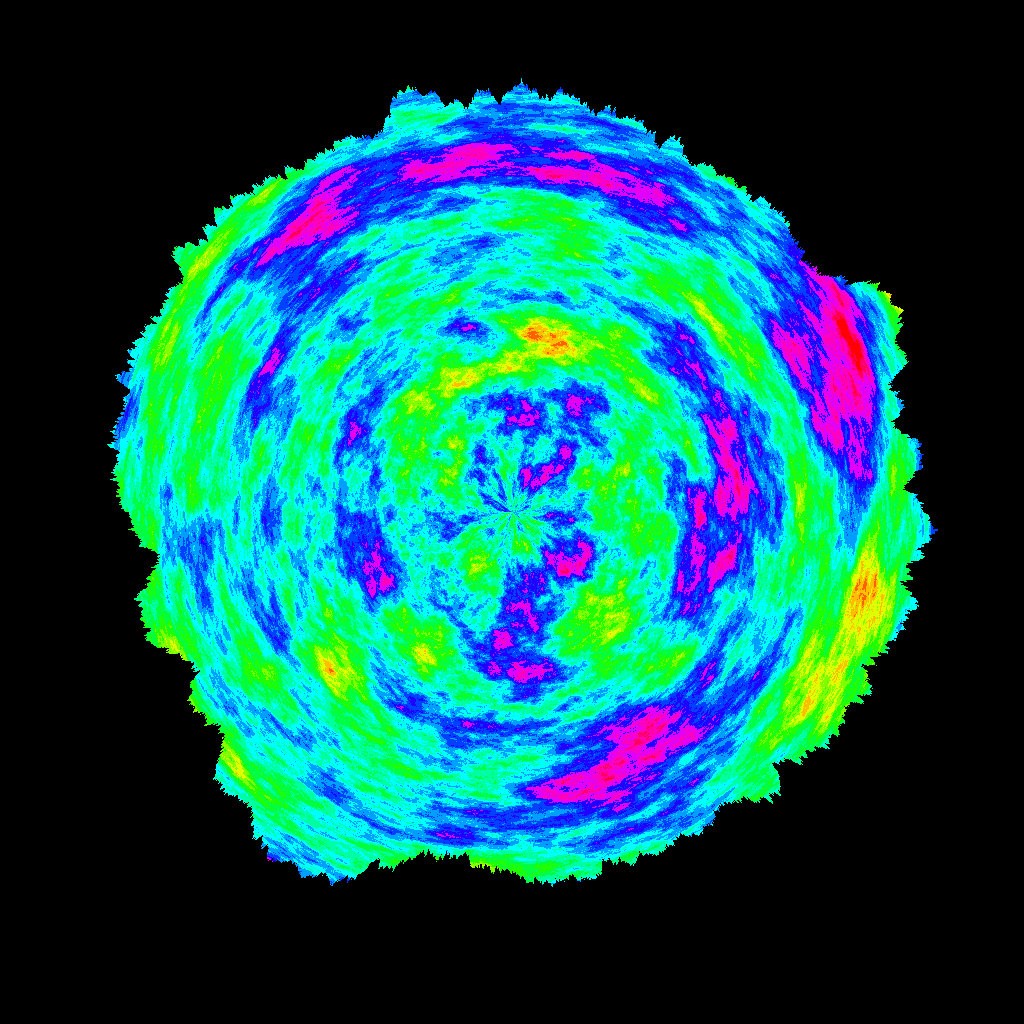

In [9]:
shape = (1024,1024)
octaves = 25
persistence = 0.7
lacunarity = 2.0
seed = 15
scale = 5
world = np.zeros(shape)
h = np.zeros(world.shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)
        h[i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed, repeat=1*scale)
world = (world - world.min())
world *= 100 / world.max()
h = (h - h.min())
h *= 100 / h.max()
h = h + shape[0]/3

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        lt = np.arange(0, 101, step=6.25)
        if r * shape[1] / 2 < h[i][j]:
            if world[i][j] < lt[0]:
                color_world[i][j] = hsv2rgb(0,1,1)
            elif world[i][j] < lt[1]:
                color_world[i][j] = hsv2rgb(1/16,1,1)
            elif world[i][j] < lt[2]:
                color_world[i][j] = hsv2rgb(2/16,1,1)
            elif world[i][j] < lt[3]:
                color_world[i][j] = hsv2rgb(3/16,1,1)
            elif world[i][j] < lt[4]:
                color_world[i][j] = hsv2rgb(4/16,1,1)
            elif world[i][j] < lt[5]:
                color_world[i][j] = hsv2rgb(5/16,1,1)
            elif world[i][j] < lt[6]:
                color_world[i][j] = hsv2rgb(6/16,1,1)
            elif world[i][j] < lt[7]:
                color_world[i][j] = hsv2rgb(7/16,1,1)
            elif world[i][j] < lt[8]:
                color_world[i][j] = hsv2rgb(8/16,1,1)
            elif world[i][j] < lt[9]:
                color_world[i][j] = hsv2rgb(9/16,1,1)
            elif world[i][j] < lt[10]:
                color_world[i][j] = hsv2rgb(10/16,1,1)
            elif world[i][j] < lt[11]:
                color_world[i][j] = hsv2rgb(11/16,1,1)
            elif world[i][j] < lt[12]:
                color_world[i][j] = hsv2rgb(13/16,1,1)
            elif world[i][j] < lt[13]:
                color_world[i][j] = hsv2rgb(14/16,1,1)
            elif world[i][j] < lt[14]:
                color_world[i][j] = hsv2rgb(15/16,1,1)
            else:
                color_world[i][j] = hsv2rgb(1,1,1)
        else:
            color_world[i][j] = [0, 0, 0]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

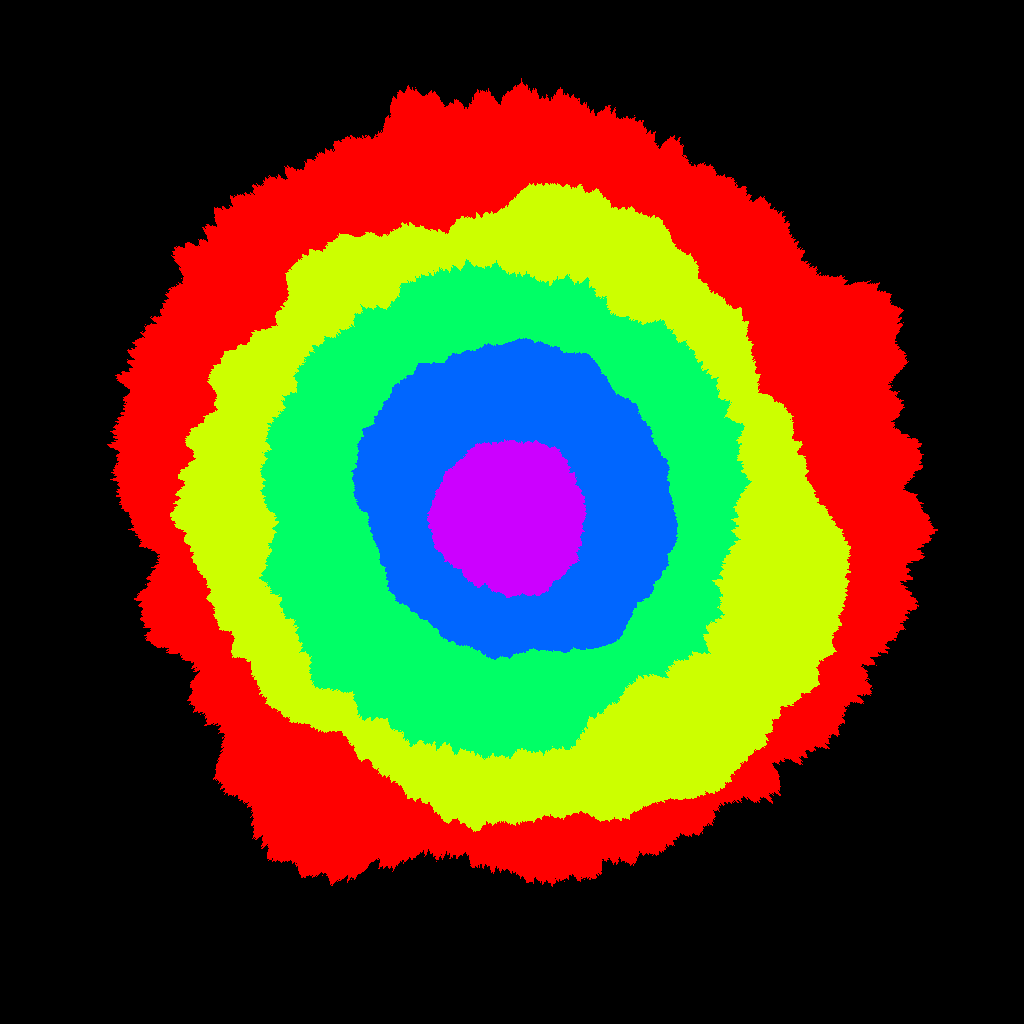

In [10]:
shape = (1024,1024)
octaves = 25
persistence = 0.7
lacunarity = 2.0
seed = 15
scale = 5
world = np.zeros(shape)
h = np.zeros((5,)+world.shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)
        h[0][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed, repeat=1*scale)
        h[1][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+1, repeat=1*scale)
        h[2][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+2, repeat=1*scale)
        h[3][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+3, repeat=1*scale)
        h[4][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+4, repeat=1*scale)
world = (world - world.min())
world *= 100 / world.max()

h[0] = (h[0] - h[0].min())
h[0] *= 100 / h[0].max()
h[0] = h[0] + shape[0]/3

h[1] = (h[1] - h[1].min())
h[1] *= 80 / h[1].max()
h[1] = h[1] + shape[0]/3 * 0.8

h[2] = (h[2] - h[2].min())
h[2] *= 60 / h[2].max()
h[2] = h[2] + shape[0]/3 * 0.6

h[3] = (h[3] - h[3].min())
h[3] *= 40 / h[3].max()
h[3] = h[3] + shape[0]/3 * 0.4

h[4] = (h[4] - h[4].min())
h[4] *= 20 / h[4].max()
h[4] = h[4] + shape[0]/3 * 0.2

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        lt = np.arange(0, 101, step=6.25)
        if h[1][i][j] < r * shape[1] / 2 < h[0][i][j]:
            color_world[i][j] = hsv2rgb(0,1,1)
        elif h[2][i][j] < r * shape[1] / 2 < h[1][i][j]:
            color_world[i][j] = hsv2rgb(1/5,1,1)
        elif h[3][i][j] < r * shape[1] / 2 < h[2][i][j]:
            color_world[i][j] = hsv2rgb(2/5,1,1)
        elif h[4][i][j] < r * shape[1] / 2 < h[3][i][j]:
            color_world[i][j] = hsv2rgb(3/5,1,1)
        elif r * shape[1] / 2 < h[4][i][j]:
            color_world[i][j] = hsv2rgb(4/5,1,1)
        else:
            color_world[i][j] = [0, 0, 0]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

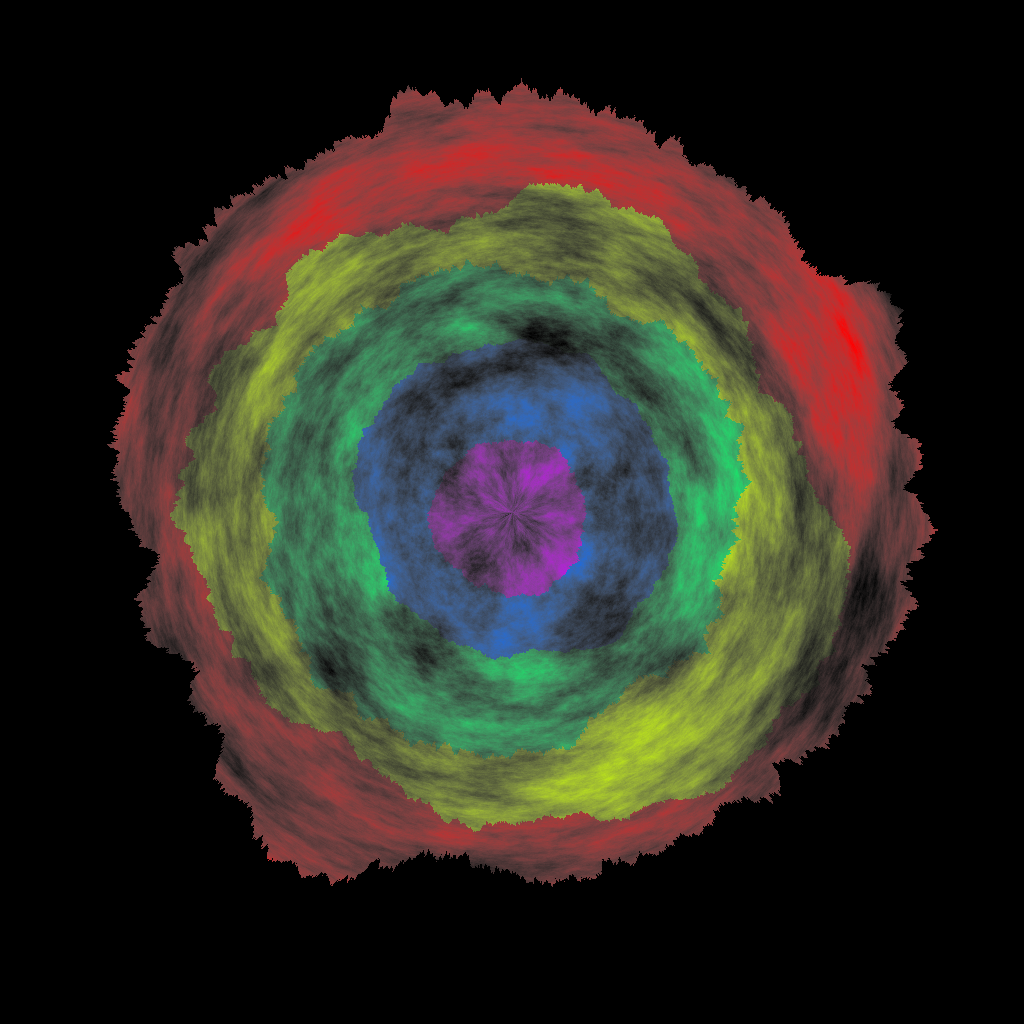

In [11]:
shape = (1024,1024)
octaves = 25
persistence = 0.7
lacunarity = 2.0
seed = 15
scale = 5
world = np.zeros(shape)
h = np.zeros((5,)+world.shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)
        h[0][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed, repeat=1*scale)
        h[1][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+1, repeat=1*scale)
        h[2][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+2, repeat=1*scale)
        h[3][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+3, repeat=1*scale)
        h[4][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+4, repeat=1*scale)
world = (world - world.min())
world *= 100 / world.max()

h[0] = (h[0] - h[0].min())
h[0] *= 100 / h[0].max()
h[0] = h[0] + shape[0]/3

h[1] = (h[1] - h[1].min())
h[1] *= 80 / h[1].max()
h[1] = h[1] + shape[0]/3 * 0.8

h[2] = (h[2] - h[2].min())
h[2] *= 60 / h[2].max()
h[2] = h[2] + shape[0]/3 * 0.6

h[3] = (h[3] - h[3].min())
h[3] *= 40 / h[3].max()
h[3] = h[3] + shape[0]/3 * 0.4

h[4] = (h[4] - h[4].min())
h[4] *= 20 / h[4].max()
h[4] = h[4] + shape[0]/3 * 0.2

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        lt = np.arange(0, 101, step=6.25)
        if h[1][i][j] < r * shape[1] / 2 < h[0][i][j]:
            color_world[i][j] = hsv2rgb(0,world[i][j]/100,world[i][j]/100)
        elif h[2][i][j] < r * shape[1] / 2 < h[1][i][j]:
            color_world[i][j] = hsv2rgb(1/5,world[i][j]/100,world[i][j]/100)
        elif h[3][i][j] < r * shape[1] / 2 < h[2][i][j]:
            color_world[i][j] = hsv2rgb(2/5,world[i][j]/100,world[i][j]/100)
        elif h[4][i][j] < r * shape[1] / 2 < h[3][i][j]:
            color_world[i][j] = hsv2rgb(3/5,world[i][j]/100,world[i][j]/100)
        elif r * shape[1] / 2 < h[4][i][j]:
            color_world[i][j] = hsv2rgb(4/5,world[i][j]/100,world[i][j]/100)
        else:
            color_world[i][j] = [0, 0, 0]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

In [12]:
shape = (1024,1024)
octaves = 25
persistence = 0.7
lacunarity = 2.0
seed = 15
scale = 5
world = np.zeros(shape)
h = np.zeros((5,)+world.shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)
        h[0][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed, repeat=1*scale)
        h[1][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+1, repeat=1*scale)
        h[2][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+2, repeat=1*scale)
        h[3][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+3, repeat=1*scale)
        h[4][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+4, repeat=1*scale)
world = (world - world.min())
world *= 100 / world.max()

h[0] = (h[0] - h[0].min())
h[0] *= 100 / h[0].max()
h[0] = h[0] + shape[0]/3

h[1] = (h[1] - h[1].min())
h[1] *= 80 / h[1].max()
h[1] = h[1] + shape[0]/3 * 0.8

h[2] = (h[2] - h[2].min())
h[2] *= 60 / h[2].max()
h[2] = h[2] + shape[0]/3 * 0.6

h[3] = (h[3] - h[3].min())
h[3] *= 40 / h[3].max()
h[3] = h[3] + shape[0]/3 * 0.4

h[4] = (h[4] - h[4].min())
h[4] *= 20 / h[4].max()
h[4] = h[4] + shape[0]/3 * 0.2

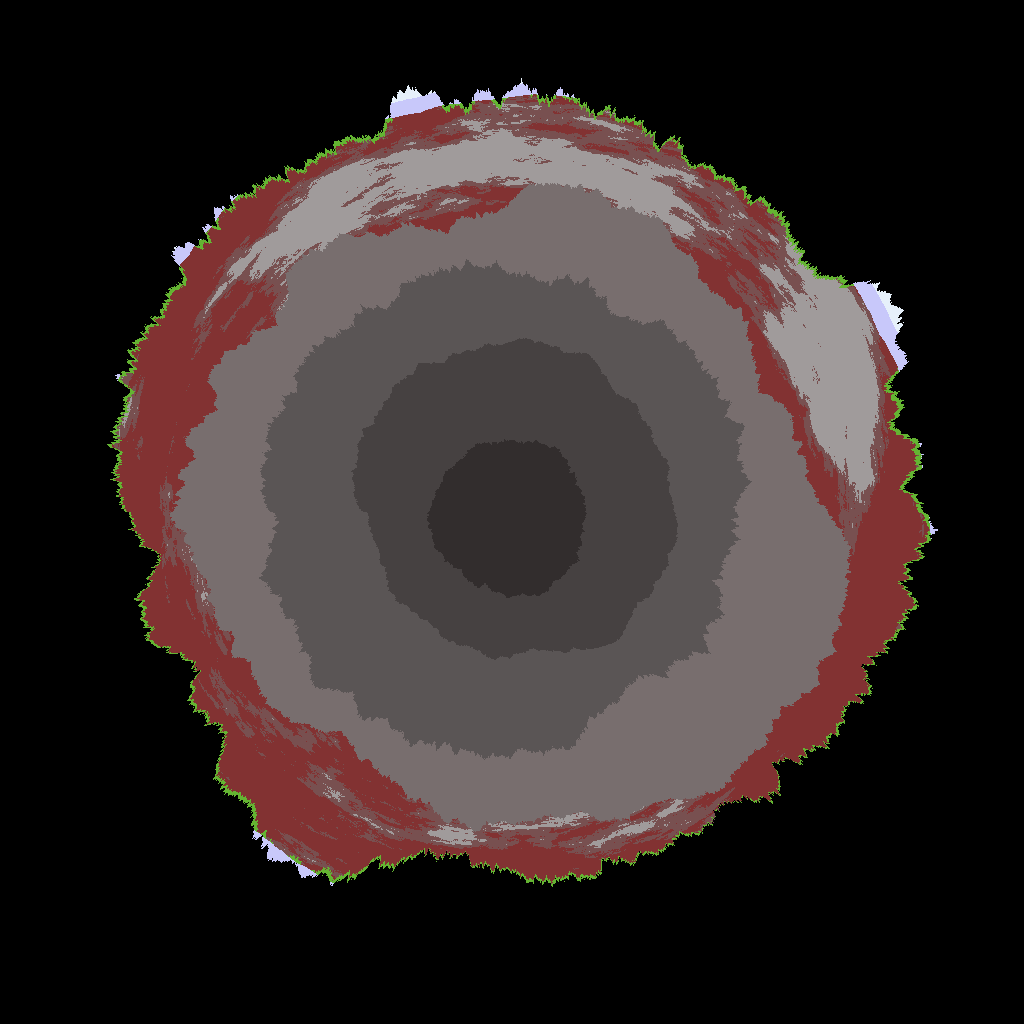

In [13]:
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        lt = np.arange(0, 101, step=6.25)
        if h[1][i][j] < r * shape[1] / 2 < h[0][i][j]:
            if r * shape[1] / 2 >= (h[0].max() - h[1][i][j]) * 0.9 + h[1][i][j]:
                color_world[i][j] = [230,240,250]
            elif r * shape[1] / 2 >= (h[0].max() - h[1][i][j]) * 0.8 + h[1][i][j]:
                color_world[i][j] = [200,200,250]
            elif r * shape[1] / 2 >= (h[0][i][j] - h[1][i][j]) * 0.95 + h[1][i][j]:
                color_world[i][j] = [100,180,50]
            else:
                if world[i][j] < 50:
                    color_world[i][j] = [130,50,50]
                elif world[i][j] < 60:
                    color_world[i][j] = [120,80,80]
                else:
                    color_world[i][j] = [160,155,155]
        elif h[2][i][j] < r * shape[1] / 2 < h[1][i][j]:
            color_world[i][j] = [120,110,110]
        elif h[3][i][j] < r * shape[1] / 2 < h[2][i][j]:
            color_world[i][j] = [90,85,85]
        elif h[4][i][j] < r * shape[1] / 2 < h[3][i][j]:
            color_world[i][j] = [70,65,65]
        elif r * shape[1] / 2 < h[4][i][j]:
            color_world[i][j] = [50,45,45]
        else:
            color_world[i][j] = [0, 0, 0]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

In [14]:
print('min',world.min())
print('max',world.max())
print('mean',world.mean())
print('median',np.median(world))
print('npixels',world.size)
print('>=100 ',len(np.where(world >= 100)[0])/world.size*100, '%')
print('>=90 ',len(np.where(world >= 90)[0])/world.size*100, '%')
print('>=80 ',len(np.where(world >= 80)[0])/world.size*100, '%')
print('>=70 ',len(np.where(world >= 70)[0])/world.size*100, '%')
print('>=60 ',len(np.where(world >= 60)[0])/world.size*100, '%')
print('>=50 ',len(np.where(world >= 50)[0])/world.size*100, '%')
print('>=40 ',len(np.where(world >= 40)[0])/world.size*100, '%')
print('>=30 ',len(np.where(world >= 30)[0])/world.size*100, '%')
print('>=20 ',len(np.where(world >= 20)[0])/world.size*100, '%')
print('>=10 ',len(np.where(world >= 10)[0])/world.size*100, '%')
print()
print('<=90 ',len(np.where(world <= 90)[0])/world.size*100, '%')
print('<=80 ',len(np.where(world <= 80)[0])/world.size*100, '%')
print('<=70 ',len(np.where(world <= 70)[0])/world.size*100, '%')
print('<=60 ',len(np.where(world <= 60)[0])/world.size*100, '%')
print('<=50 ',len(np.where(world <= 50)[0])/world.size*100, '%')
print('<=40 ',len(np.where(world <= 40)[0])/world.size*100, '%')
print('<=30 ',len(np.where(world <= 30)[0])/world.size*100, '%')
print('<=20 ',len(np.where(world <= 20)[0])/world.size*100, '%')
print('<=10 ',len(np.where(world <= 10)[0])/world.size*100, '%')
print()

print('90 100 ',len(np.where((90 <= world) & (world <= 100))[0])/world.size*100, '%')
print('80 90 ',len(np.where((80 <= world) & (world <= 90))[0])/world.size*100, '%')
print('70 80 ',len(np.where((70 <= world) & (world <= 80))[0])/world.size*100, '%')
print('60 70 ',len(np.where((60 <= world) & (world <= 70))[0])/world.size*100, '%')
print('50 60 ',len(np.where((50 <= world) & (world <= 60))[0])/world.size*100, '%')
print('40 50 ',len(np.where((40 <= world) & (world <= 50))[0])/world.size*100, '%')
print('30 40 ',len(np.where((30 <= world) & (world <= 40))[0])/world.size*100, '%')
print('20 30 ',len(np.where((20 <= world) & (world <= 30))[0])/world.size*100, '%')
print('10 20 ',len(np.where((10 <= world) & (world <= 20))[0])/world.size*100, '%')
print('0 10 ',len(np.where(world <= 10)[0])/world.size*100, '%')

min 0.0
max 100.0
mean 47.54539496178335
median 47.19432638883191
npixels 1048576
>=100  9.5367431640625e-05 %
>=90  0.040531158447265625 %
>=80  0.6870269775390625 %
>=70  5.316352844238281 %
>=60  17.63925552368164 %
>=50  41.496849060058594 %
>=40  71.31614685058594 %
>=30  90.8416748046875 %
>=20  98.27947616577148 %
>=10  99.81870651245117 %

<=90  99.95946884155273 %
<=80  99.31297302246094 %
<=70  94.68364715576172 %
<=60  82.36074447631836 %
<=50  58.503150939941406 %
<=40  28.683853149414062 %
<=30  9.1583251953125 %
<=20  1.7205238342285156 %
<=10  0.18129348754882812 %

90 100  0.040531158447265625 %
80 90  0.6464958190917969 %
70 80  4.629325866699219 %
60 70  12.32290267944336 %
50 60  23.857593536376953 %
40 50  29.819297790527344 %
30 40  19.525527954101562 %
20 30  7.437801361083984 %
10 20  1.5392303466796875 %
0 10  0.18129348754882812 %


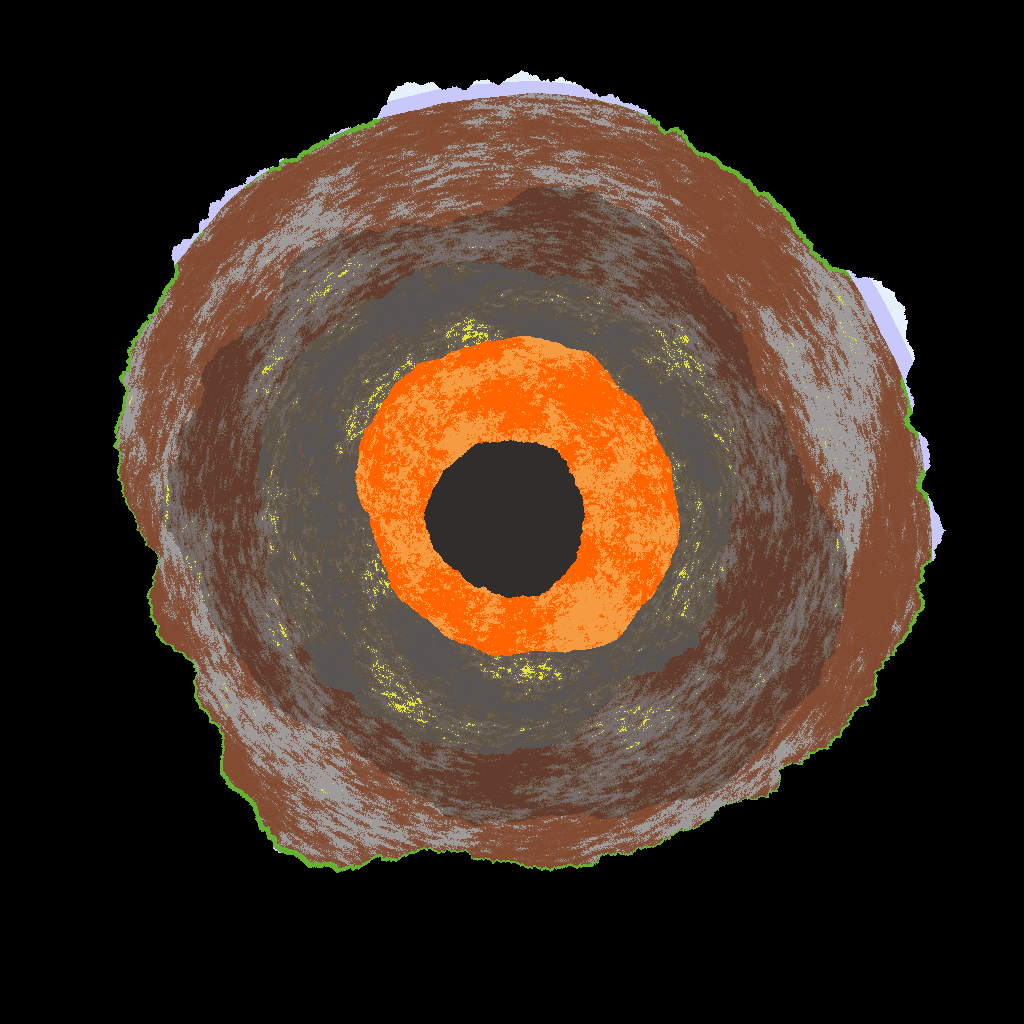

In [15]:
shape = (1024,1024)
octaves = 16
persistence = 0.6
lacunarity = 2.0
seed = 15
scale = 10
world = np.zeros(shape)
h = np.zeros((5,)+world.shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale) + \
                      noise.pnoise2(r*scale*10,
                                    theta/(np.pi*2)*scale*10,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)/1.5 + \
                      noise.pnoise2(r*scale*100,
                                    theta/(np.pi*2)*scale*100,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)/2

        h[0][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed, repeat=1*scale)
        h[1][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+1, repeat=1*scale)
        h[2][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+2, repeat=1*scale)
        h[3][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+3, repeat=1*scale)
        h[4][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+4, repeat=1*scale)
world = (world - world.min())
world *= world.shape[0]/10 / world.max()

h[0] = (h[0] - h[0].min())
h[0] *= world.shape[0]/10 / h[0].max()
h[0] = h[0] + shape[0]/3

h[1] = (h[1] - h[1].min())
h[1] *= world.shape[0]/10 * 0.8 / h[1].max()
h[1] = h[1] + shape[0]/3 * 0.8

h[2] = (h[2] - h[2].min())
h[2] *= world.shape[0]/10 * 0.6 / h[2].max()
h[2] = h[2] + shape[0]/3 * 0.6

h[3] = (h[3] - h[3].min())
h[3] *= world.shape[0]/10 * 0.4 / h[3].max()
h[3] = h[3] + shape[0]/3 * 0.4

h[4] = (h[4] - h[4].min())
h[4] *= world.shape[0]/10 * 0.2 / h[4].max()
h[4] = h[4] + shape[0]/3 * 0.2

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        lt = np.arange(0, 101, step=6.25)
        if h[1][i][j] < r * shape[1] / 2 < h[0][i][j]:
            if r * shape[1] / 2 >= (h[0].max() - h[1][i][j]) * 0.9 + h[1][i][j]:
                color_world[i][j] = [230,240,250]
            elif r * shape[1] / 2 >= (h[0].max() - h[1][i][j]) * 0.8 + h[1][i][j]:
                color_world[i][j] = [200,200,250]
            elif r * shape[1] / 2 >= (h[0][i][j] - h[1][i][j]) * 0.95 + h[1][i][j]:
                color_world[i][j] = [100,180,50]
            else:
                if world[i][j] < 50:
                    color_world[i][j] = [130,75,50]
                elif world[i][j] < 60:
                    color_world[i][j] = [135,90,70]
                elif world[i][j] < 90:
                    color_world[i][j] = [160,155,155]
                else:
                    color_world[i][j] = [230,230,50]
        elif h[2][i][j] < r * shape[1] / 2 < h[1][i][j]:
            if world[i][j] < 50:
                color_world[i][j] = [100,60,45]
            elif world[i][j] < 60:
                color_world[i][j] = [110,90,75]
            elif world[i][j] < 80:
                color_world[i][j] = [120,110,110]
            else:
                color_world[i][j] = [230,230,50]
        elif h[3][i][j] < r * shape[1] / 2 < h[2][i][j]:
            if world[i][j] < 50:
                color_world[i][j] = [90,85,85]
            elif world[i][j] < 60:
                color_world[i][j] = [100,85,65]
            elif world[i][j] < 75:
                color_world[i][j] = [110,100,95]
            else:
                color_world[i][j] = [230,230,50]
        elif h[4][i][j] < r * shape[1] / 2 < h[3][i][j]:
            if world[i][j] < 50:
                color_world[i][j] = [245,155,65]
            else:
                color_world[i][j] = [255,100,0]
        elif r * shape[1] / 2 < h[4][i][j]:
            color_world[i][j] = [50,45,45]
        else:
            color_world[i][j] = [0, 0, 0]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)

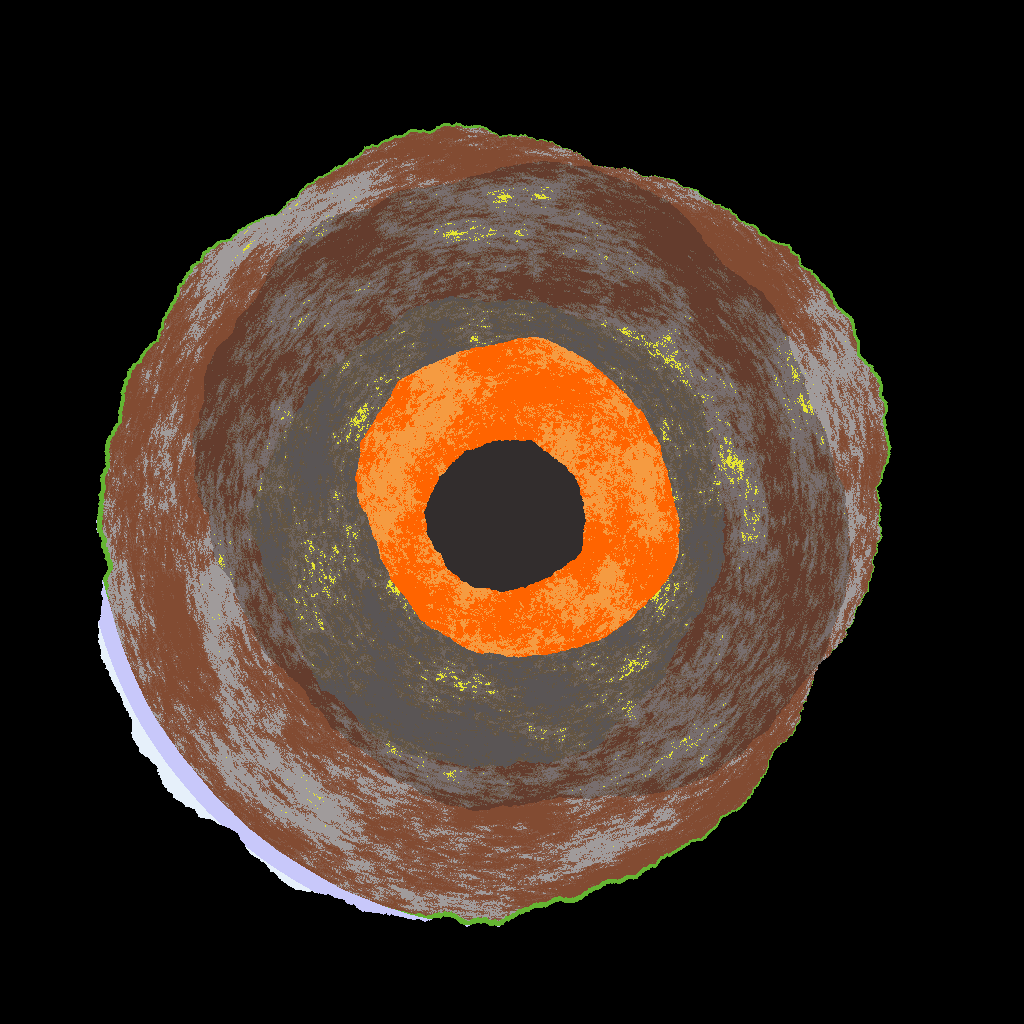

In [16]:
shape = (1024,1024)
octaves = 16
persistence = 0.6
lacunarity = 2.0
seed = 25
scale = 10
world = np.zeros(shape)
h = np.zeros((5,)+world.shape)
color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        world[i][j] = noise.pnoise2(r*scale,
                                    theta/(np.pi*2)*scale,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale) + \
                      noise.pnoise2(r*scale*10,
                                    theta/(np.pi*2)*scale*10,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)/1.5 + \
                      noise.pnoise2(r*scale*100,
                                    theta/(np.pi*2)*scale*100,
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity,
                                    base=seed, repeaty=1*scale)/2

        h[0][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves, 
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed, repeat=1*scale)
        h[1][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+1, repeat=1*scale)
        h[2][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+2, repeat=1*scale)
        h[3][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+3, repeat=1*scale)
        h[4][i][j] = noise.pnoise1(theta/(np.pi*2),
                                octaves=octaves,
                                persistence=persistence, 
                                lacunarity=lacunarity,
                                base=seed+4, repeat=1*scale)
world = (world - world.min())
world *= world.shape[0]/10 / world.max()

h[0] = (h[0] - h[0].min())
h[0] *= world.shape[0]/10 / h[0].max()
h[0] = h[0] + shape[0]/3

h[1] = (h[1] - h[1].min())
h[1] *= world.shape[0]/10 * 0.8 / h[1].max()
h[1] = h[1] + shape[0]/3 * 0.8

h[2] = (h[2] - h[2].min())
h[2] *= world.shape[0]/10 * 0.6 / h[2].max()
h[2] = h[2] + shape[0]/3 * 0.6

h[3] = (h[3] - h[3].min())
h[3] *= world.shape[0]/10 * 0.4 / h[3].max()
h[3] = h[3] + shape[0]/3 * 0.4

h[4] = (h[4] - h[4].min())
h[4] *= world.shape[0]/10 * 0.2 / h[4].max()
h[4] = h[4] + shape[0]/3 * 0.2

color_world = np.zeros(world.shape+(3,))
for i in range(shape[0]):
    for j in range(shape[1]):
        x = (shape[1]/2 - j)/(shape[1]/2)
        y = (shape[0]/2 - i)/(shape[0]/2)
        r = np.sqrt(x**2 + y**2)
        if y >= 0 and r != 0:
            theta = np.arccos(x/r)
        elif y < 0:
            theta = -np.arccos(x/r)
        else:
            theta = 0
        if theta < 0:
            theta += np.pi*2
        lt = np.arange(0, 101, step=6.25)
        if h[1][i][j] < r * shape[1] / 2 < h[0][i][j]:
            if r * shape[1] / 2 >= (h[0].max() - h[1][i][j]) * 0.9 + h[1][i][j]:
                color_world[i][j] = [230,240,250]
            elif r * shape[1] / 2 >= (h[0].max() - h[1][i][j]) * 0.8 + h[1][i][j]:
                color_world[i][j] = [200,200,250]
            elif r * shape[1] / 2 >= (h[0][i][j] - h[1][i][j]) * 0.95 + h[1][i][j]:
                color_world[i][j] = [100,180,50]
            else:
                if world[i][j] < 50:
                    color_world[i][j] = [130,75,50]
                elif world[i][j] < 60:
                    color_world[i][j] = [135,90,70]
                elif world[i][j] < 90:
                    color_world[i][j] = [160,155,155]
                else:
                    color_world[i][j] = [230,230,50]
        elif h[2][i][j] < r * shape[1] / 2 < h[1][i][j]:
            if world[i][j] < 50:
                color_world[i][j] = [100,60,45]
            elif world[i][j] < 60:
                color_world[i][j] = [110,90,75]
            elif world[i][j] < 80:
                color_world[i][j] = [120,110,110]
            else:
                color_world[i][j] = [230,230,50]
        elif h[3][i][j] < r * shape[1] / 2 < h[2][i][j]:
            if world[i][j] < 50:
                color_world[i][j] = [90,85,85]
            elif world[i][j] < 60:
                color_world[i][j] = [100,85,65]
            elif world[i][j] < 75:
                color_world[i][j] = [110,100,95]
            else:
                color_world[i][j] = [230,230,50]
        elif h[4][i][j] < r * shape[1] / 2 < h[3][i][j]:
            if world[i][j] < 50:
                color_world[i][j] = [245,155,65]
            else:
                color_world[i][j] = [255,100,0]
        elif r * shape[1] / 2 < h[4][i][j]:
            color_world[i][j] = [50,45,45]
        else:
            color_world[i][j] = [0, 0, 0]
color_world = np.array(color_world).astype(np.uint8)
Image.fromarray(color_world)